In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np

In [35]:
# Read the dataset 
excel = pd.ExcelFile('C:/Users/Dell/OneDrive - National Economics University/Documents/Econometrics Assignment/Bank/bank-additional-full.xlsx')

df = excel.parse('Worksheet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Descriptive Statistics

In [ ]:
# Seperate dataframe into numeric and non-numeric:

numeric_data = df.select_dtypes(include = 'number')
categorical_df = df.select_dtypes(include= 'object')

df1 = df[numeric_data.columns]
df2 = df[categorical_df.columns]

In [ ]:
df1.info()
print()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non

### Measure of Central Tendency

A central or typical value for a probability distribution and are often called averages.

Measure of Central Tendency is defined by the mean, median, mode

In [36]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Frequency Distribution Table

The summary of the values and their absolute and relative frequencies in **bar graph**  

    => Get an overview of the distribution of data

#### Numeric Data

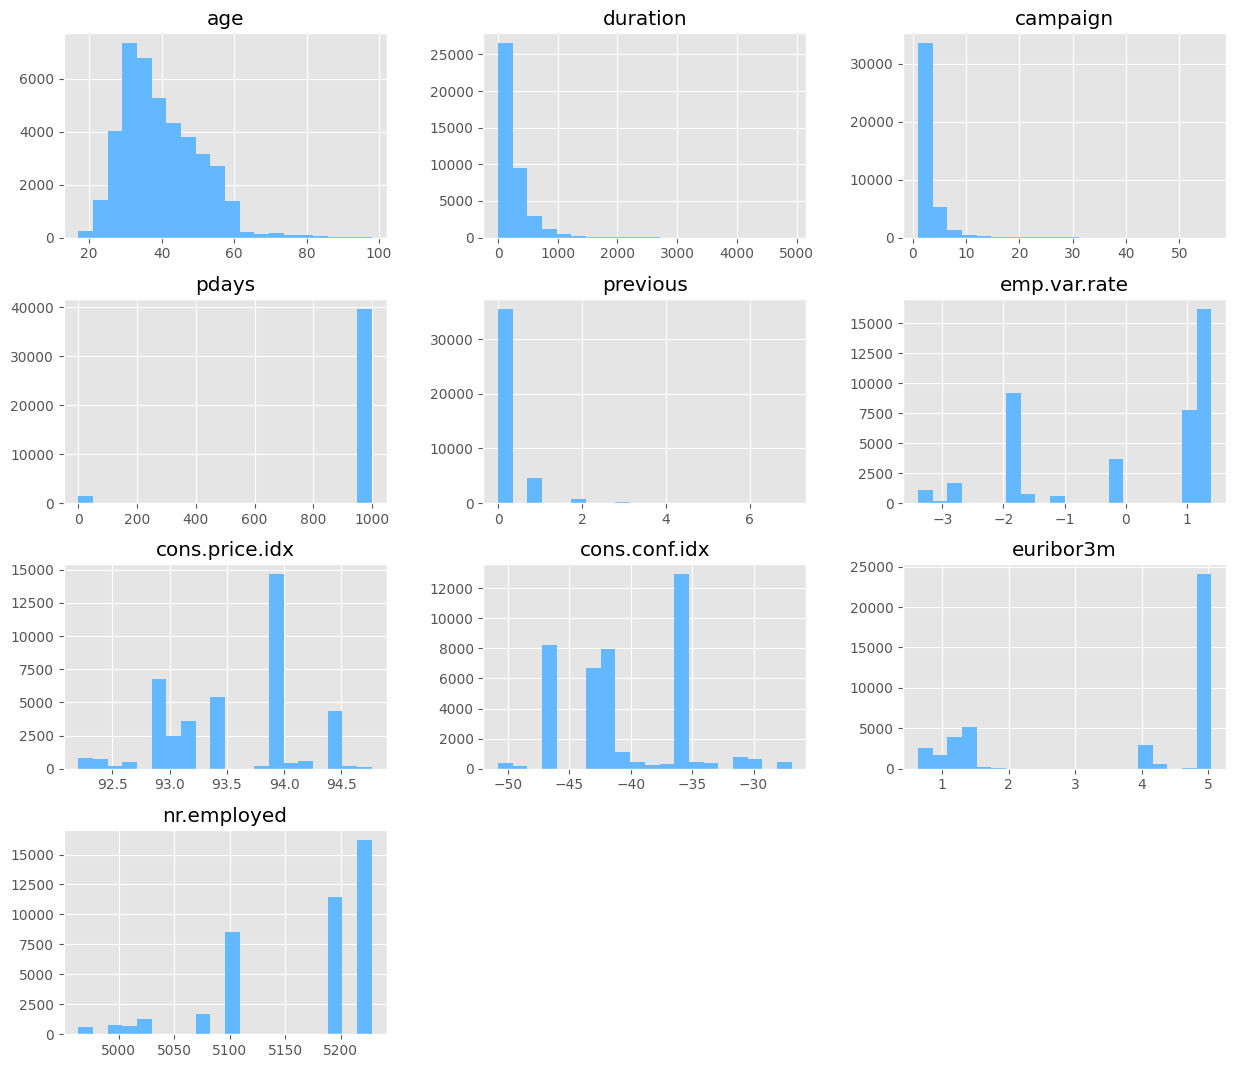

In [39]:
# Histogram of numeric data
plt.style.use('ggplot')

df1.hist(bins = 20, figsize = (15, 13), color = '#63B8FF')
plt.show()

#### Non-numerical data

In [40]:

def graph(column):
    temp = pd.DataFrame()
    
    temp['No deposit'] = df[df['y'] == 'no'][column].value_counts()
    temp['Yes deposit'] = df[df['y'] == 'yes'][column].value_counts()
    temp.plot(kind='bar')
    
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

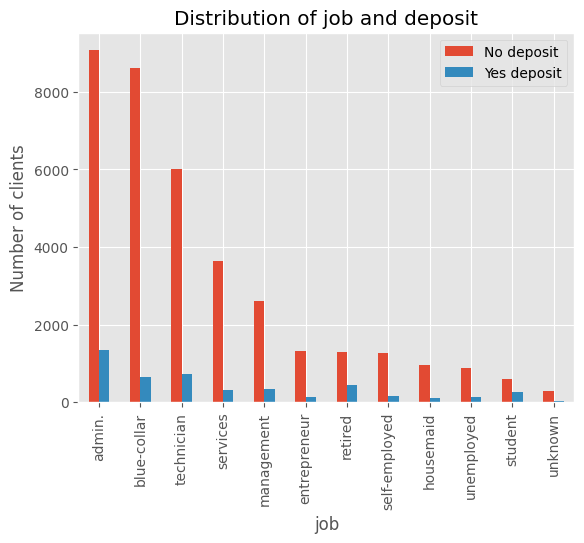

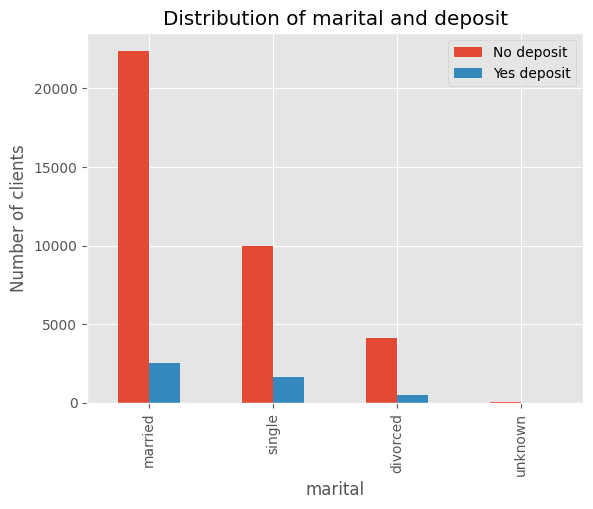

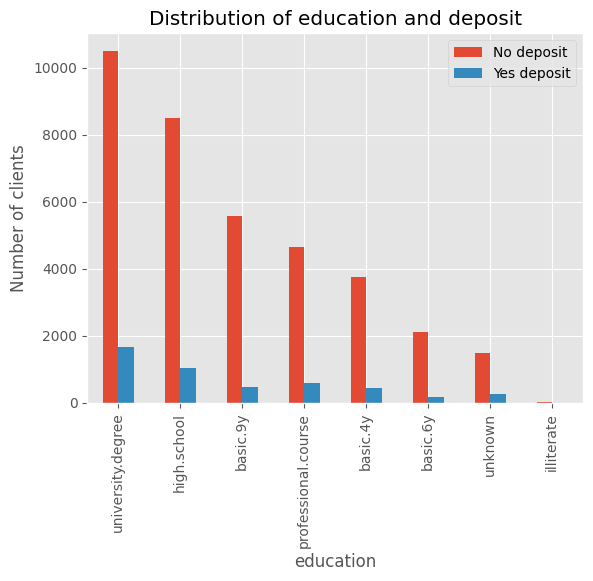

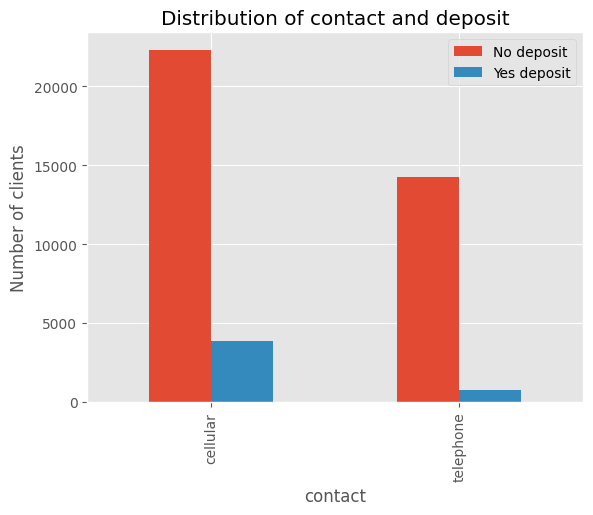

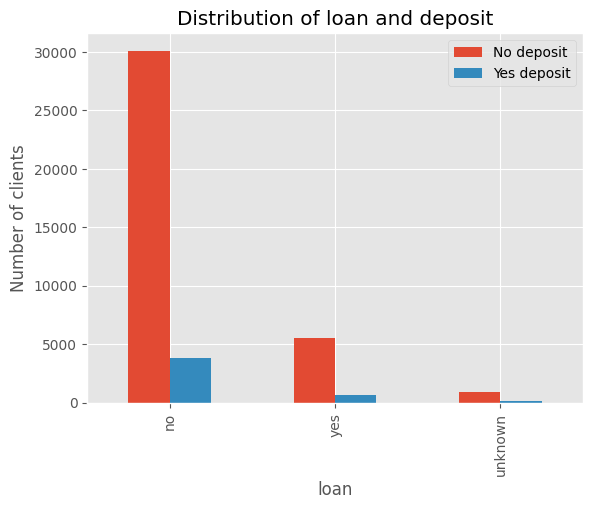

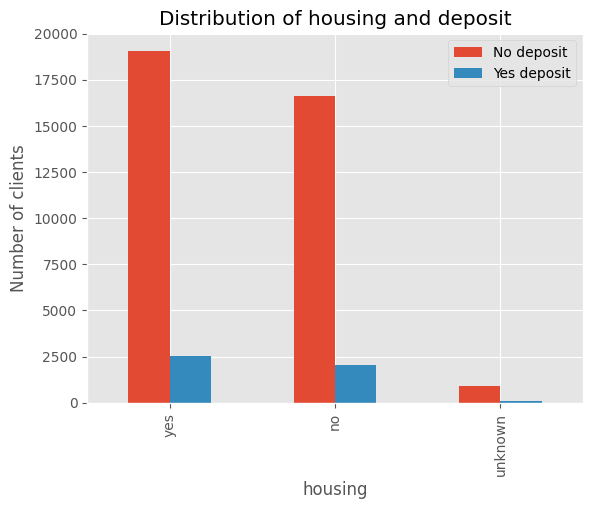

(None, None, None, None, None, None)

In [41]:
# Categorical values disribution
graph('job'), graph('marital'), graph('education'), graph('contact'), graph('loan'), graph('housing')

### Measure of Dispersion

Shows the extent to which a numerical data is likely to vary about an average value and helps us to understand the distribution of the data. 

=> Measure of Dispersion is defined by the variance and standard deviation of the distribution.

#### Descriptive Statistics - Dispersion

 Dispersion in statistics is a way of describing how spread out a set of data is.  

 It is also called variability, scatter, or spread.   

-> Dispersion helps to understand the distribution of the data

In [79]:
# Numeric data
def dispersion_row(column):    
    # transpose the columns and rows in the dataframe
    temp = df1.transpose()
    temp = temp.loc[column]
    
    print(f"\n{'POPULATION - Dispersion for df1 - '}{column}",
                f"\n{'Population Variance:':<35}{st.pvariance(temp):>10,.4f}",
                f"\n{'Population Standard Deviation':<35}{st.pstdev(temp):>10,.4f}",
                f"\n{'Population Coefficient of Variance:':<35}{st.pstdev(temp)/np.mean(temp):>10,.4f}",

                f"\n\n{'SAMPLE - Dispersion for df1 - '}{column}",
                f"\n{'Sample Variance:':<35}{st.variance(temp):>10,.4f}",
                f"\n{'Sample Standard Deviation':<35}{st.stdev(temp):>10,.4f}",
                f"\n{'Sample Coefficient of Variance:':<35}{st.stdev(temp)/np.mean(temp):>10,.4f}")

In [80]:
# Check for the dispersion of the attributes
dispersion_row('age'),
dispersion_row('duration'),
dispersion_row('campaign'),
dispersion_row('pdays'),
dispersion_row('previous'), 
dispersion_row('emp.var.rate'),
dispersion_row('cons.price.idx'),
dispersion_row('cons.conf.idx'),
dispersion_row('euribor3m'),	
dispersion_row('nr.employed')


POPULATION - Dispersion for df1 - age 
Population Variance:                 108.5998 
Population Standard Deviation         10.4211 
Population Coefficient of Variance:    0.2604 

SAMPLE - Dispersion for df1 - age 
Sample Variance:                     108.6025 
Sample Standard Deviation             10.4212 
Sample Coefficient of Variance:        0.2604

POPULATION - Dispersion for df1 - duration 
Population Variance:               67,224.0967 
Population Standard Deviation        259.2761 
Population Coefficient of Variance:    1.0038 

SAMPLE - Dispersion for df1 - duration 
Sample Variance:                   67,225.7289 
Sample Standard Deviation            259.2792 
Sample Coefficient of Variance:        1.0038

POPULATION - Dispersion for df1 - campaign 
Population Variance:                   7.6728 
Population Standard Deviation          2.7700 
Population Coefficient of Variance:    1.0788 

SAMPLE - Dispersion for df1 - campaign 
Sample Variance:                       7.6730 


### Covariance Matrix

Measures the total variation of two random variables from their expected values.

 => Gauge the direction of the relationship (*does not indicate the strength of the relationship, nor the dependency between the variables*)

- .> 0 - the two variables tend to move in the same direction
- < 0 - the two variables tend to move in inverse directions
- = 0 - the two variables are independent of each other

In [ ]:
cov = df1.cov()
cov.style.background_gradient(cmap = 'PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,108.602451,-2.339147,0.132603,-66.945400,0.125661,-0.006069,0.005168,6.239801,0.194622,-13.346160
duration,-2.339147,67225.728877,-51.494888,-2305.683015,2.648520,-11.391802,0.797272,-9.807412,-14.793831,-837.439866
campaign,0.132603,-51.494888,7.672975,27.224921,-0.108494,0.656017,0.204971,-0.176061,0.649236,28.838822
pdays,-66.945400,-2305.683015,27.224921,34935.687284,-54.346448,79.574823,8.535132,-79.016677,96.250874,5031.877477
previous,0.125661,2.648520,-0.108494,-54.346448,0.244927,-0.326918,-0.058190,-0.116670,-0.390128,-17.926342
emp.var.rate,-0.006069,-11.391802,0.656017,79.574823,-0.326918,2.467915,0.705038,1.425360,2.649121,102.944953
cons.price.idx,0.005168,0.797272,0.204971,8.535132,-0.058190,0.705038,0.335056,0.158023,0.690961,21.832546
cons.conf.idx,6.239801,-9.807412,-0.176061,-79.016677,-0.116670,1.425360,0.158023,21.420215,2.229089,33.611125
euribor3m,0.194622,-14.793831,0.649236,96.250874,-0.390128,2.649121,0.690961,2.229089,3.008308,118.443421
nr.employed,-13.346160,-837.439866,28.838822,5031.877477,-17.926342,102.944953,21.832546,33.611125,118.443421,5220.283250


### Correlation Coefficient Matrix
  
Find how strong a relationship is between data. The formulas return a value between -1 and 1, where:
- +1 - indicates a strong positive relationship. Perfect positive correlation
- -1 - indicates a strong negative relationship. Perfect negative correlation
- 0 - no relationship at all. Absolutely independent variables.

In [ ]:
corr = df1.corr()
corr.style.background_gradient(cmap = 'PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000
